In [1]:
import numpy as np
import os
import pandas as pd
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from pydub import AudioSegment

In [2]:
dataset_dir="C:/Users/sathv/Downloads/new_audios/Voice of Birds/Voice of Birds"

In [3]:
label_mapping = {}
# Iterate over subdirectories (classes) in the dataset directory
for label in os.listdir(dataset_dir):
    label_dir = dataset_dir+'/'+label
    # Check if the item in the dataset directory is a directory
    if os.path.isdir(label_dir):
        # Iterate over audio files in the subdirectory (class)
        for audio_file in os.listdir(label_dir):
            # Add the mapping between audio file path and label to the dictionary
            audio_file_path = label_dir +"/"+ audio_file
            label_mapping[audio_file_path] = label

In [4]:
def extract_features(file_path):
    audio = AudioSegment.from_mp3(file_path)
    
    audio.export("temp.wav", format="wav")

    y, sr = librosa.load("temp.wav", sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    features = np.concatenate((mfcc_mean, mfcc_std))
    os.remove("temp.wav")
    return features

In [5]:
data = [(audio_file_path, label) for audio_file_path, label in label_mapping.items()]
# Create a Pandas DataFrame from the list of tuples
annotated_data = pd.DataFrame(data, columns=['audio_file_path', 'label'])
annotated_data['audio_file_path'][0]

'C:/Users/sathv/Downloads/new_audios/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'

In [6]:


from tqdm import tqdm

extracted_features = []

for i in tqdm(annotated_data['audio_file_path']):
    features = extract_features(i)
    # print(features)
    extracted_features.append(features)

 31%|███       | 666/2161 [02:52<04:19,  5.77it/s]C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=576
  warnings.warn(
100%|██████████| 2161/2161 [07:49<00:00,  4.60it/s]


In [7]:
label_encoder = LabelEncoder()
annotated_data['encoded_label'] = label_encoder.fit_transform(annotated_data['label'])
annotated_data

,audio_file_path,label,encoded_label
0,C:/Users/sathv/Downloads/new_audios/Voice of B...,Andean Guan_sound,0
1,C:/Users/sathv/Downloads/new_audios/Voice of B...,Andean Guan_sound,0
2,C:/Users/sathv/Downloads/new_audios/Voice of B...,Andean Guan_sound,0
3,C:/Users/sathv/Downloads/new_audios/Voice of B...,Andean Guan_sound,0
4,C:/Users/sathv/Downloads/new_audios/Voice of B...,Andean Guan_sound,0
...,...,...,...
2156,C:/Users/sathv/Downloads/new_audios/Voice of B...,Yellow-legged Tinamou_sound,113
2157,C:/Users/sathv/Downloads/new_audios/Voice of B...,Yellow-legged Tinamou_sound,113
2158,C:/Users/sathv/Downloads/new_audios/Voice of B...,Yellow-legged Tinamou_sound,113
2159,C:/Users/sathv/Downloads/new_audios/Voice of B...,Yellow-legged Tinamou_sound,113


In [8]:
x = np.vstack(extracted_features)
y = annotated_data['encoded_label']

print(x.shape)
print(y.shape)

(2161, 26)
(2161,)


In [10]:
x

array([[-3.3674106e+02,  8.7952446e+01,  3.3695117e-02, ...,
         6.7855792e+00,  6.6039996e+00,  8.3487482e+00],
       [-3.4011203e+02,  1.1411749e+02, -5.7556538e+01, ...,
         7.2985845e+00,  8.0522070e+00,  7.1992135e+00],
       [-3.4137357e+02,  4.4650955e+01, -7.7641243e+01, ...,
         9.1438093e+00,  9.4333305e+00,  8.3908148e+00],
       ...,
       [-3.1509021e+02,  5.5627872e+01, -8.1352066e+01, ...,
         5.2750263e+00,  5.1156416e+00,  5.5629196e+00],
       [-3.1509021e+02,  5.5627872e+01, -8.1352066e+01, ...,
         5.2750263e+00,  5.1156416e+00,  5.5629196e+00],
       [-3.1509021e+02,  5.5627872e+01, -8.1352066e+01, ...,
         5.2750263e+00,  5.1156416e+00,  5.5629196e+00]], dtype=float32)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [18]:
np.savez('new_dat.npz', X=X, y=y)

In [20]:
dat=pd.read_csv("C:/Users/sathv/Downloads/new_audios/Birds Voice.csv")

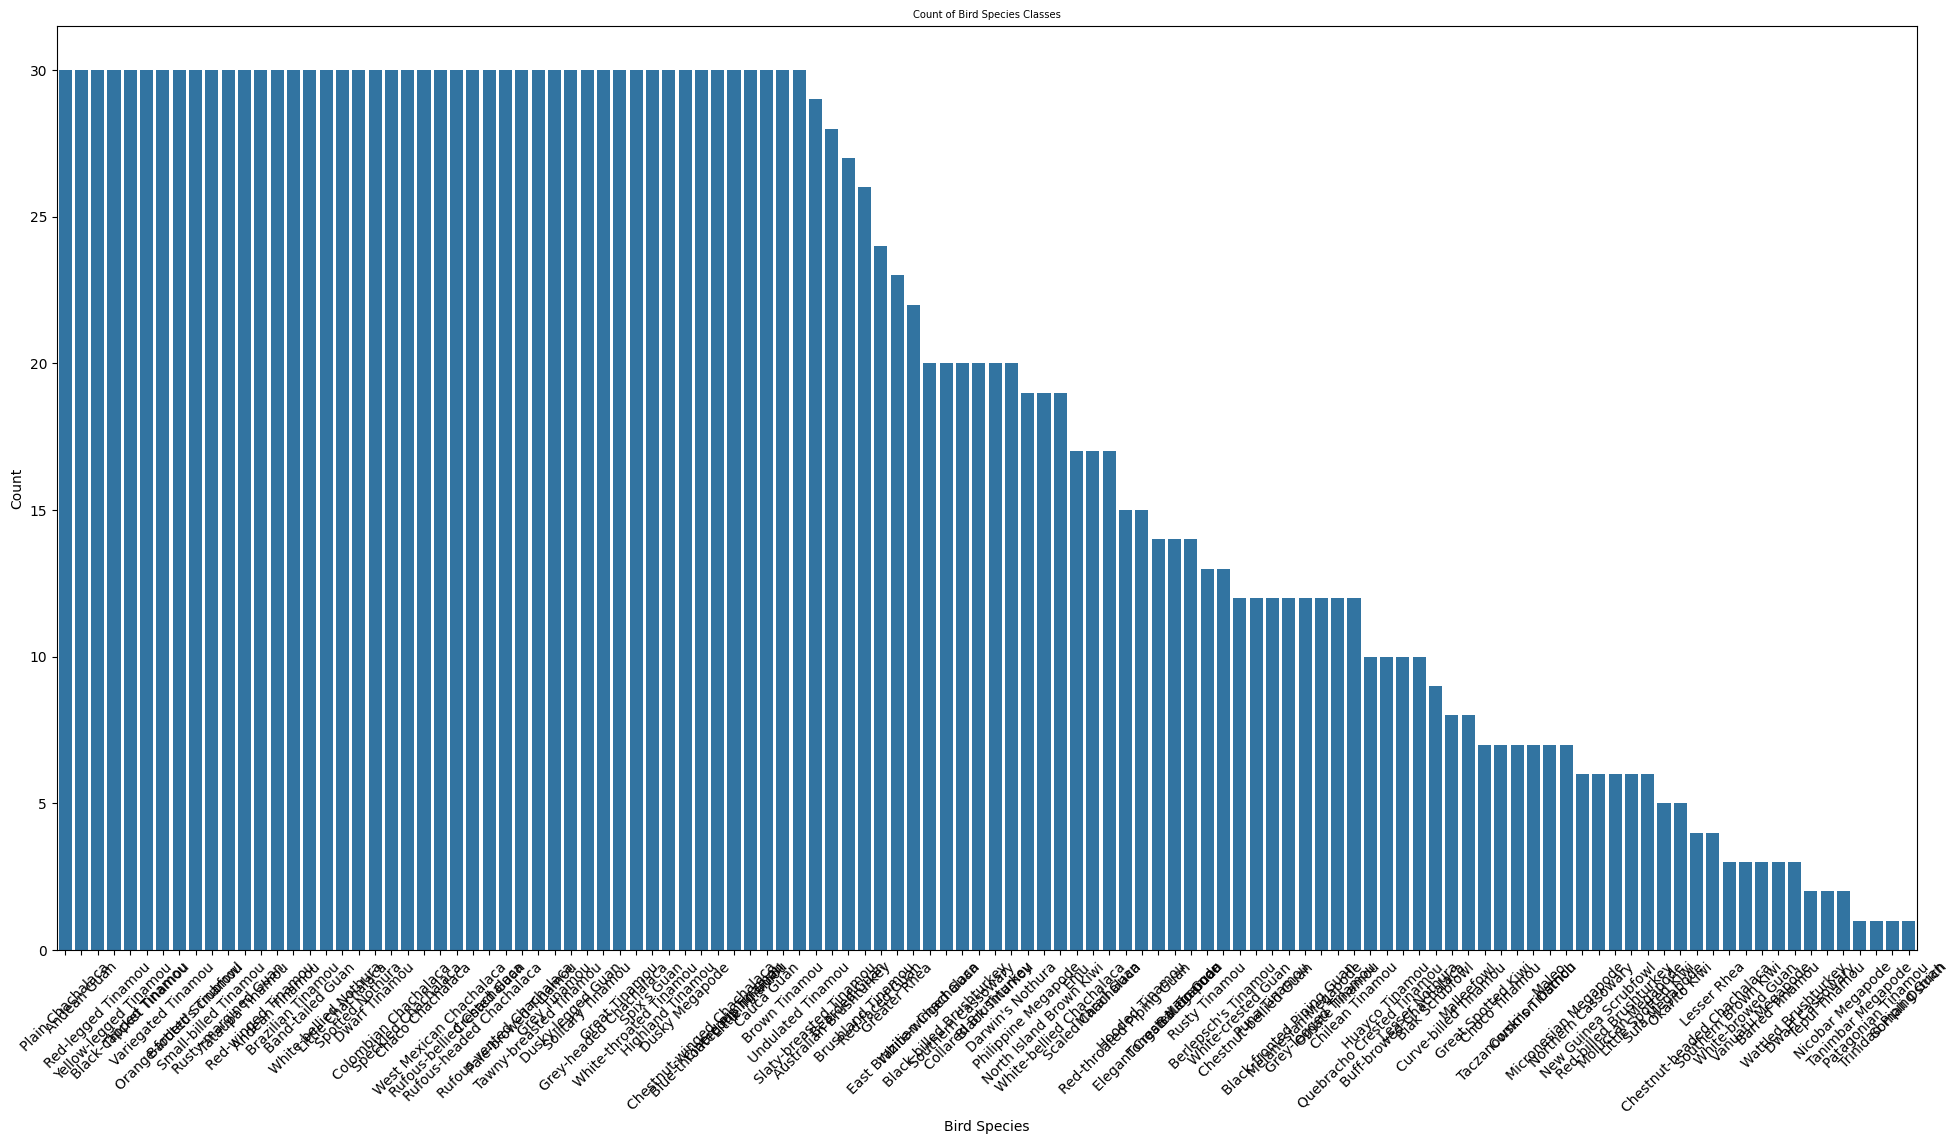

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24, 12))
sns.countplot(x='common_name', data=dat, order=dat['common_name'].value_counts().index)
plt.xticks(rotation=45)
plt.rc('font', size=6)
plt.title('Count of Bird Species Classes')
plt.xlabel('Bird Species')
plt.ylabel('Count')
plt.show()

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
features_resampled, labels_reshampled = ros.fit_resample(X, y)

print(features_resampled.shape)
print(labels_reshampled.shape)

(3420, 26)
(3420,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(features_resampled, labels_reshampled, test_size=0.2, random_state=42)

In [28]:
random_forest_classifier = RandomForestClassifier(n_estimators=2000, random_state=2)
random_forest_model = random_forest_classifier.fit(x_train, y_train)


Accuracy: 0.7529239766081871


In [29]:
import joblib
joblib_file = "random_forest_model2.pkl"
joblib.dump(random_forest_classifier, joblib_file)

['random_forest_model2.pkl']

In [32]:
y_predict = random_forest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7529239766081871
